# Exploratory Data Analysis on the Emergency - 911 Calls Dataset

In this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable

### Importing packages

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [100]:
data=pd.read_csv("911.csv")

### Basic data exploration

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 14 columns):
lat            326425 non-null float64
lng            326425 non-null float64
desc           326425 non-null object
zip            286835 non-null float64
title          326425 non-null object
timeStamp      326425 non-null datetime64[ns]
twp            326310 non-null object
addr           326425 non-null object
e              326425 non-null int64
reason         326425 non-null object
Hour           326425 non-null int64
Month          326425 non-null int64
Day of Week    326425 non-null object
Date           326425 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 34.9+ MB


In [99]:
data.describe()

,lat,lng,zip,e,Hour,Month
count,326425.000000,326425.000000,286835.000000,326425.0,326425.000000,326425.00000
mean,40.159163,-75.316090,19234.318333,1.0,13.049077,6.18308
std,0.088485,0.160077,303.629187,0.0,5.638840,3.66233
min,30.333596,-95.595595,7203.000000,1.0,0.000000,1.00000
25%,40.099888,-75.392104,19038.000000,1.0,9.000000,3.00000
50%,40.144467,-75.304422,19401.000000,1.0,13.000000,6.00000
75%,40.229008,-75.210760,19446.000000,1.0,17.000000,9.00000
max,41.167156,-74.280113,77316.000000,1.0,23.000000,12.00000


In [6]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Top 5 zipcodes for 911 calls

In [103]:
data['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

### Top 5 townships (twp) for 911 calls

In [104]:
data['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

### Unique number of calls reported

In [105]:
data['title'].nunique()

133

#### Creating new features
In the titles column there are "Reasons/Departments" specified before the title code. 
For example, if the title column value is Fire: GAS-ODOR/LEAK , the Reason column value would be Fire.

In [106]:
data['reason']=data['title'].apply(lambda x: x.split(':')[0])

### Most common Reason for a 911 call 

In [17]:
data['reason'].value_counts()

EMS        161441
Traffic    116065
Fire        48919
Name: reason, dtype: int64

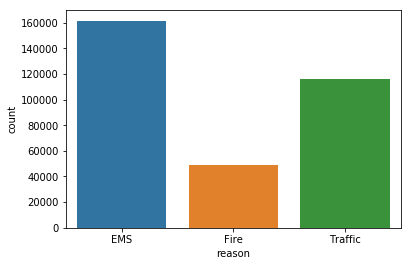

In [116]:
sns.countplot(x='reason',data=data)

#### The major reason for 911 calls was EMS- Emergency Medical Services followed by Traffic and Fire

### Changing the datatype of "timeStamp" from string to TimeStamp to extract more information

In [110]:
type(data['timeStamp'].iloc[0])

str

In [111]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [112]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [113]:
data['Hour']=data['timeStamp'].apply(lambda time: time.hour)
data['Month']=data['timeStamp'].apply(lambda time: time.month)
data['Day of Week']=data['timeStamp'].apply(lambda time: time.dayofweek)

In [44]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week']=data['Day of Week'].map(dmap)

In [114]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


### Creating countplots to study the reasons trends during Day of Week and Month

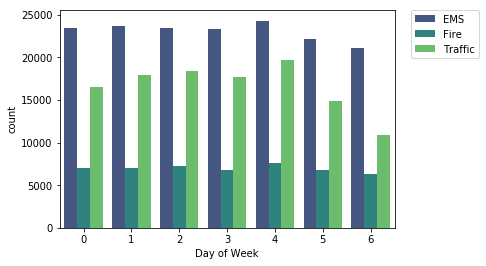

In [115]:
sns.countplot(x='Day of Week',data=data,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

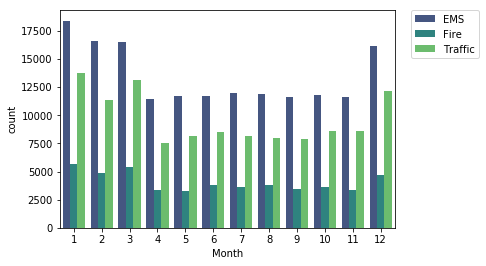

In [48]:
sns.countplot(x='Month',data=data,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [49]:
bymonth=data.groupby('Month').count()

In [117]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


### Create a linear fit on the number of calls per month

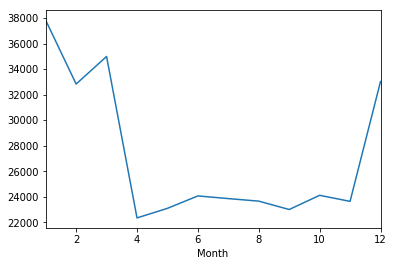

In [52]:
bymonth['lat'].plot()

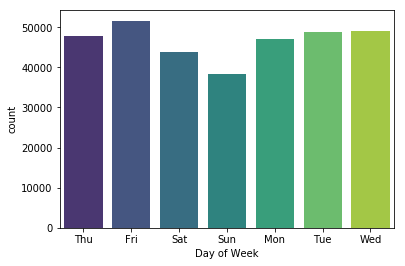

In [53]:
sns.countplot(x='Month',data=data,palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

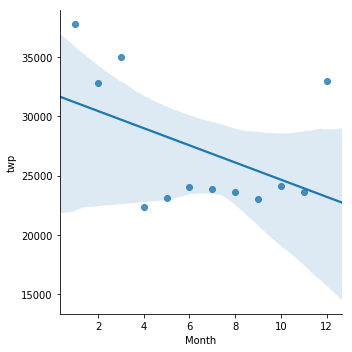

In [97]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [118]:
 data['Date']=data['timeStamp'].apply(lambda x: x.date())

### Creating a plot of counts of 911 calls datewise 

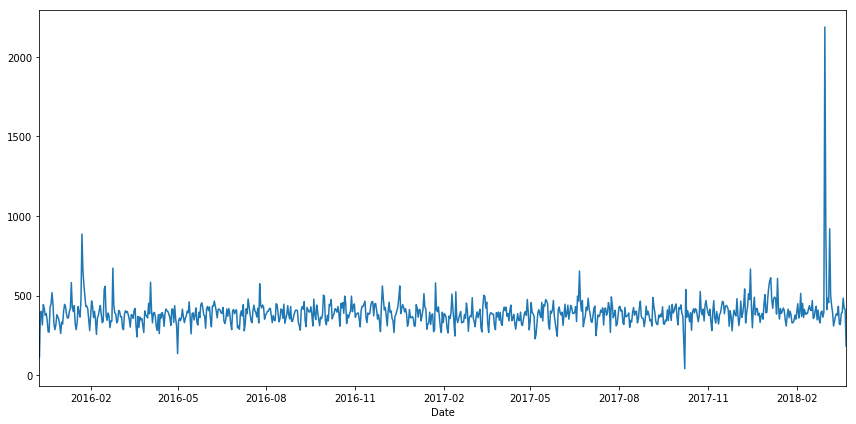

In [120]:
plt.figure(figsize=(12,6))
data.groupby('Date').count()['lat'].plot()
plt.tight_layout()

### Creating a plot of counts of 911 calls datewise( reason: Traffic)

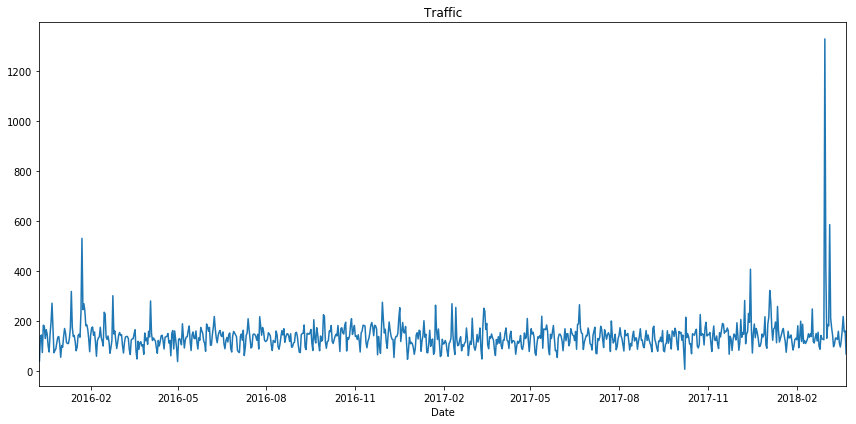

In [121]:
plt.figure(figsize=(12,6))
data[data['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

### Creating a plot of counts of 911 calls datewise( reason: EMS)

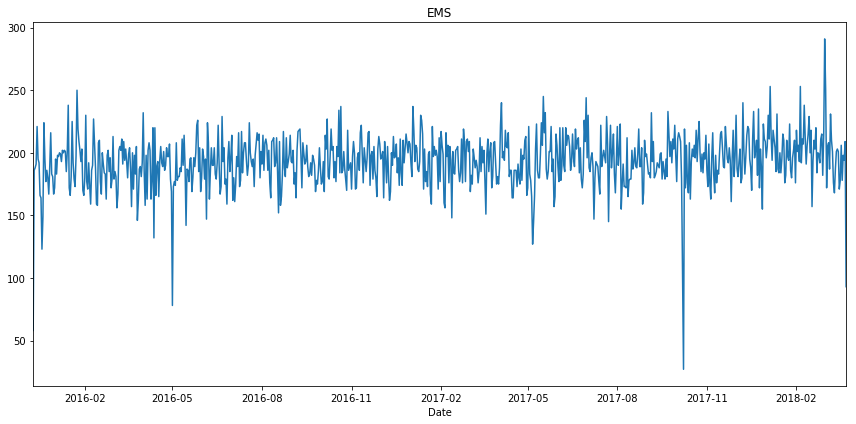

In [132]:
plt.figure(figsize=(12,6))
data[data['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

### Creating a plot of counts of 911 calls datewise( reason: Fire)

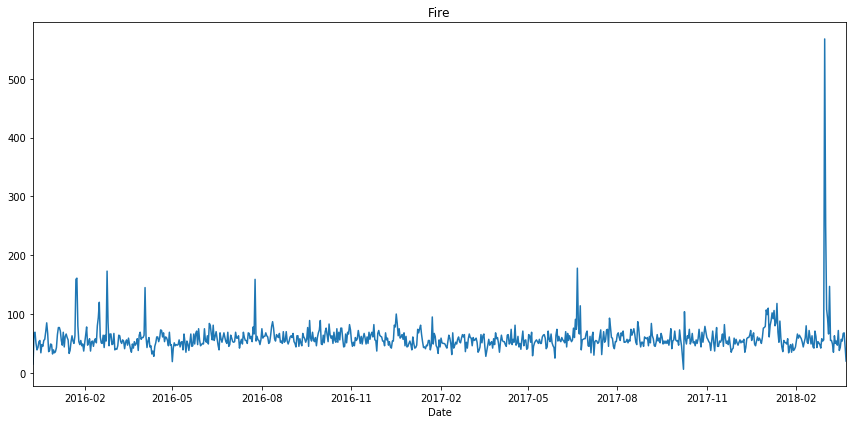

In [133]:
plt.figure(figsize=(12,6))
data[data['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

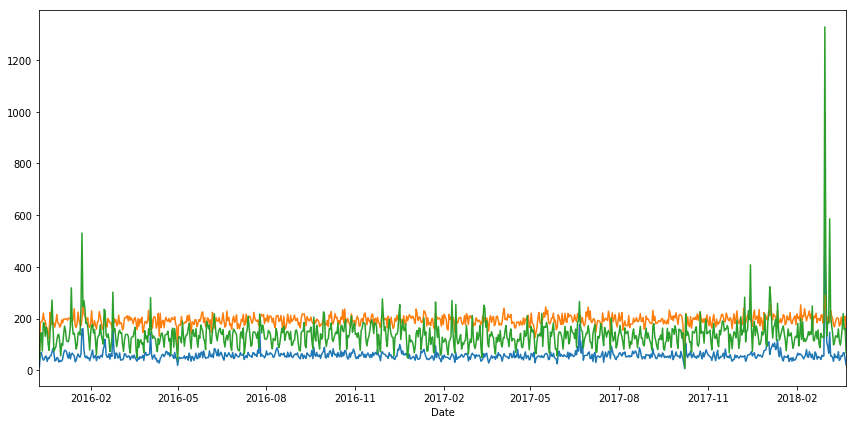

In [136]:
plt.figure(figsize=(12,6))
data[data['reason']=='Fire'].groupby('Date').count()['lat'].plot()
data[data['reason']=='EMS'].groupby('Date').count()['lat'].plot()
data[data['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

## HeatMaps

In [126]:
dayHour=data.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
1,842,698,625,598,634,858,1386,2269,2853,2764,...,2937,3149,3335,3286,2918,2283,1960,1660,1329,1025
2,805,738,620,626,560,798,1382,2319,2751,2744,...,3095,3211,3413,3435,2782,2296,2064,1682,1422,1103
3,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120
4,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396


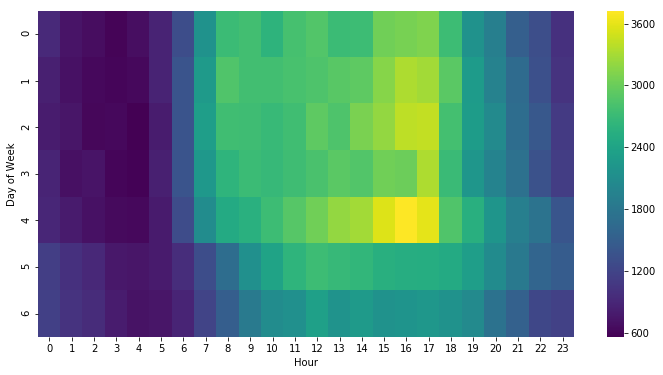

In [127]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

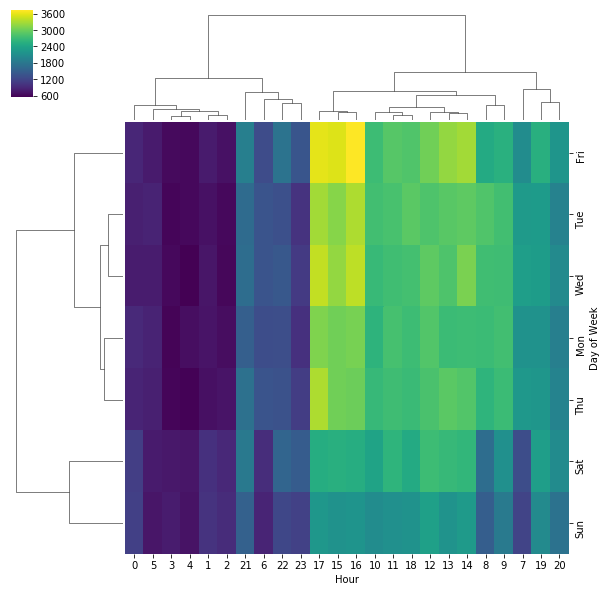

In [90]:
sns.clustermap(dayHour,cmap='viridis')

In [95]:
dayMonth=data.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570
Mon,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
Sat,5103,4431,4355,3490,2764,3024,3515,2810,3144,3042,2972,5200
Sun,4882,3806,3268,3026,2580,2679,3259,2658,2565,3172,2592,3896
Thu,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899


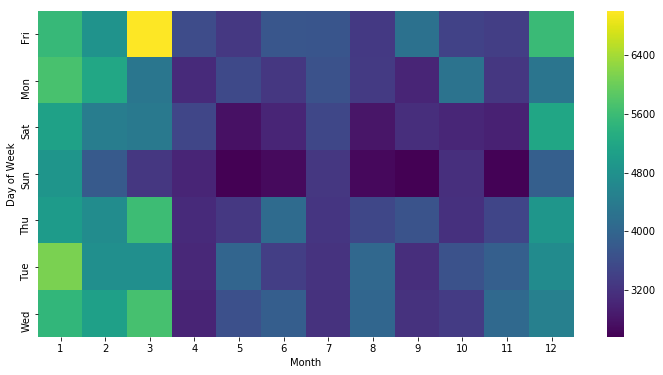

In [92]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

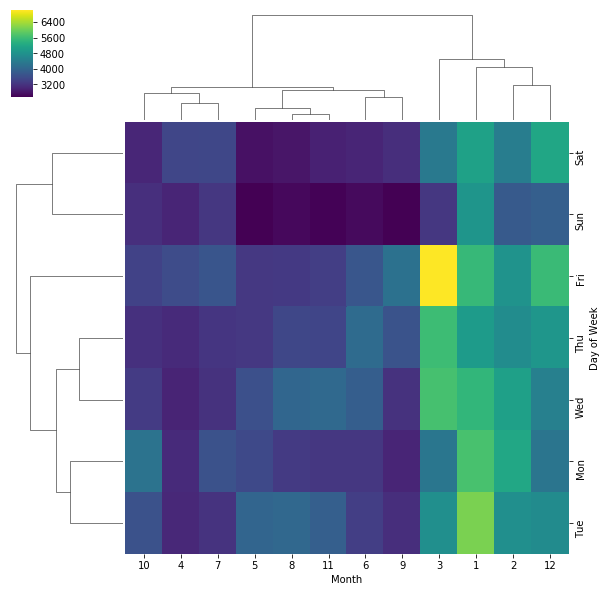

In [93]:
sns.clustermap(dayMonth,cmap='viridis')